In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading the dataset
maternal = pd.read_csv(r"/content/mamacare_symptom_risk_dataset (1).csv")
maternal.head() #to get the first five rows

,severe_headache,blurred_vision,swelling_in_hands_or_face,vaginal_bleeding,severe_abdominal_pain,dizziness_or_fainting,reduced_fetal_movement,high_stress,antenatal_visits_last_month,nutrition_quality,risk_level
0,No,Yes,Yes,No,No,No,No,Low,1,Good,Medium Risk
1,No,No,Yes,No,No,No,Yes,Low,1,Average,Medium Risk
2,No,No,No,No,No,No,No,High,0,Average,High Risk
3,No,No,Yes,No,No,No,No,Moderate,2 or more,Average,Low Risk
4,Yes,No,Yes,No,Yes,No,Yes,Low,1,Average,High Risk


In [3]:
#changing the column names
maternal.columns=['severe headache','blurred vision','swelling hands/face','vaginal bleeding','severe abdominal pain','dizziness or fainting','low fetal movement','high stress','visited antenatal last month','nutrition quality','risk level']

In [4]:
maternal.shape
#checking the number of rows and columns

(1000, 11)

In [5]:
maternal.head()

,severe headache,blurred vision,swelling hands/face,vaginal bleeding,severe abdominal pain,dizziness or fainting,low fetal movement,high stress,visited antenatal last month,nutrition quality,risk level
0,No,Yes,Yes,No,No,No,No,Low,1,Good,Medium Risk
1,No,No,Yes,No,No,No,Yes,Low,1,Average,Medium Risk
2,No,No,No,No,No,No,No,High,0,Average,High Risk
3,No,No,Yes,No,No,No,No,Moderate,2 or more,Average,Low Risk
4,Yes,No,Yes,No,Yes,No,Yes,Low,1,Average,High Risk


In [6]:
maternal.isnull().sum()
#checking for null values

,0
severe headache,0
blurred vision,0
swelling hands/face,0
vaginal bleeding,0
severe abdominal pain,0
dizziness or fainting,0
low fetal movement,0
high stress,0
visited antenatal last month,0
nutrition quality,0


In [7]:
maternal.duplicated().sum()
#checking for duplicate values

np.int64(475)

In [8]:
maternal = maternal.drop_duplicates()
#dropping duplicates

In [9]:
maternal.shape

(525, 11)

In [10]:
maternal['risk level'].value_counts()

,count
risk level,
High Risk,313
Medium Risk,144
Low Risk,68


In [11]:
maternal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 525 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   severe headache               525 non-null    object
 1   blurred vision                525 non-null    object
 2   swelling hands/face           525 non-null    object
 3   vaginal bleeding              525 non-null    object
 4   severe abdominal pain         525 non-null    object
 5   dizziness or fainting         525 non-null    object
 6   low fetal movement            525 non-null    object
 7   high stress                   525 non-null    object
 8   visited antenatal last month  525 non-null    object
 9   nutrition quality             525 non-null    object
 10  risk level                    525 non-null    object
dtypes: object(11)
memory usage: 49.2+ KB


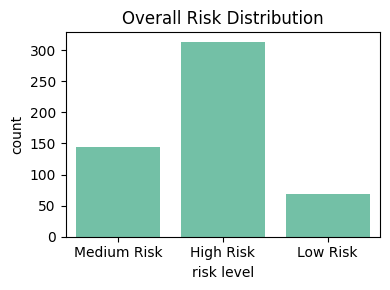

In [12]:
plt.figure(figsize=(4,3))
sns.countplot(data=maternal, x='risk level',color='mediumaquamarine')
plt.title('Overall Risk Distribution')
plt.tight_layout()
plt.show()

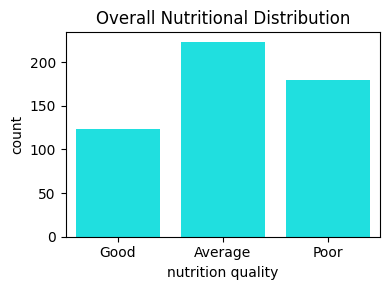

In [13]:
plt.figure(figsize=(4,3))
sns.countplot(data=maternal, x='nutrition quality',color='aqua')
plt.title('Overall Nutritional Distribution')
plt.tight_layout()
plt.show()

In [14]:
maternal['visited antenatal last month'].value_counts()

,count
visited antenatal last month,
1,231
0,173
2 or more,121


In [15]:
visited = {0:0, 1:1, "2 or more":2}

In [16]:
maternal['visited antenatal last month'] = maternal['visited antenatal last month'].replace(visited)

In [17]:
binarycolumns = ['severe headache','blurred vision','swelling hands/face','vaginal bleeding','severe abdominal pain','dizziness or fainting','low fetal movement']

In [18]:
for col in binarycolumns:
    maternal[col] = maternal[col].map({'Yes': 1, 'No': 0})
    #changing the columns into numerical values


In [19]:
maternal['high stress'].value_counts()

,count
high stress,
Low,209
Moderate,199
High,117


In [20]:
maternal['high stress'] = maternal['high stress'].map({'Low':0, 'Moderate':1, 'High':3})

In [21]:
maternal['nutrition quality'] = maternal['nutrition quality'].map({'Poor':0, 'Average':1, 'Good':2})

In [22]:
maternal['risk level'] = maternal['risk level'].map({'Low Risk':0, 'Medium Risk':1, 'High Risk':2})

In [23]:
maternal.head()

,severe headache,blurred vision,swelling hands/face,vaginal bleeding,severe abdominal pain,dizziness or fainting,low fetal movement,high stress,visited antenatal last month,nutrition quality,risk level
0,0,1,1,0,0,0,0,0,1,2,1
1,0,0,1,0,0,0,1,0,1,1,1
2,0,0,0,0,0,0,0,3,0,1,2
3,0,0,1,0,0,0,0,1,2,1,0
4,1,0,1,0,1,0,1,0,1,1,2


In [24]:
#splitting my data into features and target

In [25]:
X = maternal.drop('risk level', axis=1)
y = maternal['risk level']

In [26]:
#Handling imbalance dataset
from imblearn.over_sampling import SMOTE

In [27]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42,
)

In [29]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    },
    'SVC': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf'],
            'gamma': ['scale', 'auto']
        }
    },
    'RandomForest': {
        'model':RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 150,500],
            'max_features':['log2'],
           'min_samples_leaf':[1],
            'max_depth': [3,5,7,None],
            'min_samples_split': [2, 5, 10]
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10],
            'splitter':['best'],
            'min_samples_split':[5],
            'max_features':['sqrt'],
        }
    },
    'GradientBoosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100,200],
            'learning_rate':[0.1],
            'max_depth':[4],
            'min_samples_split':[5],
            'min_samples_leaf':[2],
            'subsample':[0.8],
            'max_features':['sqrt'],
        }
    }
}


In [30]:
best_models = {}
for model_name, mp in models.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5)
    clf.fit(X_train, y_train)
    best_models[model_name] = clf
    print(f"{model_name} best parameters: {clf.best_params_}")


Logistic Regression best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
SVC best parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
RandomForest best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
DecisionTree best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}
GradientBoosting best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}


In [31]:
from sklearn.metrics import recall_score

In [32]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print(classification_report(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.8351063829787234
Precision: 0.8328340262492867
F1 Score: 0.8333105143252536
Recall: 0.8351063829787234
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        67
           1       0.81      0.77      0.79        61
           2       0.79      0.77      0.78        60

    accuracy                           0.84       188
   macro avg       0.83      0.83      0.83       188
weighted avg       0.83      0.84      0.83       188


Model: SVC
Accuracy: 0.9680851063829787
Precision: 0.9680851063829787
F1 Score: 0.9680851063829787
Recall: 0.9680851063829787
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.95      0.95      0.95        61
           2       0.98      0.98      0.98        60

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97

In [33]:
target = ['Low Risk', 'Medium Risk', 'High Risk']

In [34]:
svc_best = SVC(C=10, gamma='auto', kernel='rbf')

In [35]:
svc_best.fit(X_train, y_train)


SVC(C=10, gamma='auto')

In [36]:
y_pred = svc_best.predict(X_test)


In [37]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9680851063829787
Precision: 0.9680851063829787
F1 Score: 0.9680851063829787
Recall: 0.9680851063829787
Confusion Matrix:
 [[65  2  0]
 [ 2 58  1]
 [ 0  1 59]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.95      0.95      0.95        61
           2       0.98      0.98      0.98        60

    accuracy                           0.97       188
   macro avg       0.97      0.97      0.97       188
weighted avg       0.97      0.97      0.97       188



In [38]:
cm = confusion_matrix(y_test, y_pred)

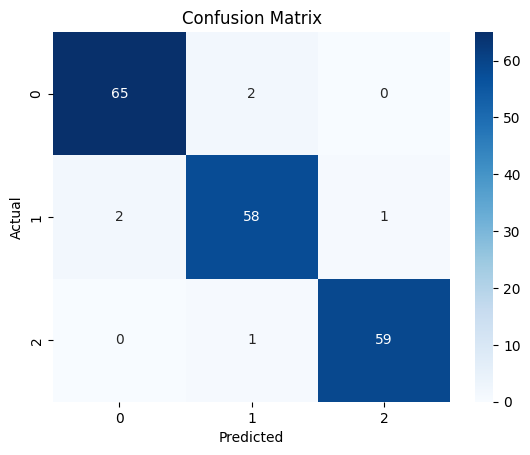

In [39]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
import joblib

In [41]:
joblib.dump(svc_best, 'maternal_model.pkl')

['maternal_model.pkl']

In [42]:
ml = joblib.load('maternal_model.pkl')

In [43]:
import os
os.listdir()


['.config',
 'mamacare_symptom_risk_dataset (1).csv',
 'maternal_model.pkl',
 'sample_data']